In [2]:
from experiment import SpacedRepetitionModel, read_data
from scipy.stats import ttest_ind, ttest_rel, wilcoxon, spearmanr
from sklearn.metrics import roc_auc_score
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def model_eval(method, input_file, max_lines=None, omit_bias = True, omit_lexemes= True, omit_h_term= True):
    trainset, testset = read_data(input_file, method, omit_bias, omit_lexemes, max_lines)
    model = SpacedRepetitionModel(method=method, omit_h_term=omit_h_term)
    model.train(trainset)
    model.eval(testset, 'test')
    if not os.path.exists('results/'+method+'/'):
        os.makedirs('results/'+method+'/')
    model.dump_weights(f'results/{method}/lex-weights')
    model.dump_predictions(f'results/{method}/lex-preds', testset)

    


def sr_evaluate(preds_file):
    print(f'%%%%%%%%%%%%%%%%%% {preds_file} %%%%%%%%%%%%%%%%%%')
    data = pd.read_csv(preds_file, sep='\t')

    print('==== mean absolute error ====')
    p_minus_pp = abs(data['p'] - data['pp'])
    p_minus_mean_p = abs(data['p'] - data['p'].mean())
    _, p_value = ttest_ind(p_minus_pp, p_minus_mean_p)
    print(f'p-value: {p_value}')

    print('==== area under the ROC curve ====') 
    roc_auc = roc_auc_score(data['p'].round(), data['pp'])
    print(f'ROC AUC: {roc_auc}')

    _, p_value = wilcoxon(data['p'].round(), data['pp'], alternative='greater')
    print(f'p-value: {p_value}')

    print('==== half-life correlation ====')
    corr_coef, p_value = spearmanr(data['h'], data['hh'])
    print(f'Spearman correlation coefficient: {corr_coef}')
    print(f'p-value: {p_value}')


In [5]:
model_eval('lr', 'sample.csv', omit_lexemes= False)

reading data...0...

1000000...done!
test	51093065.0 (p=11081.9, h=51081983.1, l2=0.0)	mae(p)=0.225	cor(p)=-0.009	mae(h)=156.118	cor(h)=-0.003


right 0.4290057292931718
wrong 0.19526232478783287
time 0.006614507296260819
de:du/du<prn><p2><mf><sg><nom> 0.004776440914245817
en:eat/eat<vblex><pres> 0.010558035163213193
es:hombre/hombre<n><m><sg> 0.01113291553057761
en:motor/motor<n><sg> 0.0013903964512578333
en:younger/young<adj><sint><comp> 0.0003147632336340978
fr:adieu/adieu<n><m><sg> 0.006838920866804993
fr:un/un<det><ind><m><sg> 0.004268774231354889
de:welches/welch<det><ind><nt><sg><nom><st> 0.0016616282568784246
es:beben/beber<vblex><pri><p3><pl> 0.010050343868931902
es:blancas/blanco<adj><f><pl> 0.006417853625606766
en:he/prpers<prn><subj><p3><m><sg> 0.012556315865761999
en:man/man<n><sg> 0.01136844864907452
en:career/career<n><sg> 0.004381038892386065
de:gut/gut<adj><pst><pred> 0.006191255669700068
fr:oui/oui<adv> 0.008634486308827708
es:me/prpers<prn><pro><p1><mf><sg> -0.0004566449993939395
es:niÃ±o/niÃ±o<n><m><sg> 0.010582429991621829
es:de/de<pr> -0.0014660628495855982
en:transportation/transportation<n><sg> 0.0029483

In [5]:
model_eval('pimsleur', 'sample.csv')

reading data...0...1000000...done!
test	49728487.5 (p=48860.6, h=49679626.9, l2=0.0)	mae(p)=0.431	cor(p)=0.027	mae(h)=153.989	cor(h)=-0.109


In [5]:
sr_evaluate('results/hlr/preds')
print('=====================================')
sr_evaluate('results/lr/preds')
print('=====================================')
sr_evaluate('results/pimsleur/preds')
print('=====================================')
sr_evaluate('results/leitner/preds')

%%%%%%%%%%%%%%%%%% results/hlr/preds %%%%%%%%%%%%%%%%%%
==== mean absolute error ====
p-value: 0.0
==== area under the ROC curve ====
ROC AUC: 0.5305633489056931
p-value: 0.0
==== half-life correlation ====
Spearman correlation coefficient: -0.13801790012924697
p-value: 0.0
%%%%%%%%%%%%%%%%%% results/lr/preds %%%%%%%%%%%%%%%%%%
==== mean absolute error ====
p-value: 0.0
==== area under the ROC curve ====
ROC AUC: 0.488106140417393
p-value: 0.0
==== half-life correlation ====
Spearman correlation coefficient: 0.0023611094870471276
p-value: 0.39726326418883007
%%%%%%%%%%%%%%%%%% results/pimsleur/preds %%%%%%%%%%%%%%%%%%
==== mean absolute error ====
p-value: 0.0
==== area under the ROC curve ====
ROC AUC: 0.514540952245237
p-value: 0.0
==== half-life correlation ====
Spearman correlation coefficient: -0.12801646766679722
p-value: 0.0
%%%%%%%%%%%%%%%%%% results/leitner/preds %%%%%%%%%%%%%%%%%%
==== mean absolute error ====
p-value: 0.0
==== area under the ROC curve ====
ROC AUC: 0.5433640

In [8]:
sample_df = pd.read_csv("sample.csv")

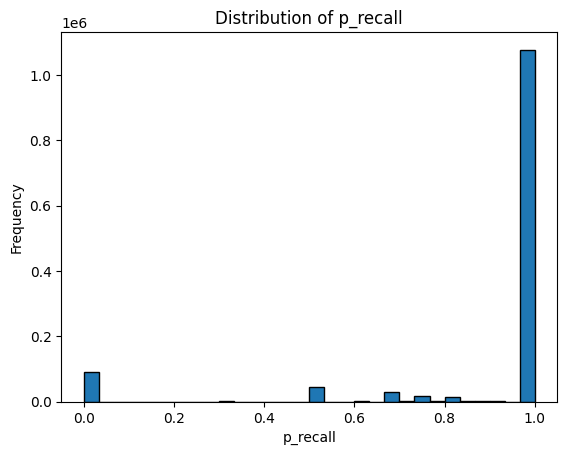

In [3]:
import matplotlib.pyplot as plt
plt.hist(sample_df['p_recall'], bins=30, edgecolor='black')
plt.title('Distribution of p_recall')
plt.xlabel('p_recall')
plt.ylabel('Frequency')
plt.show()

In [8]:
#do some basic data analysis
print(sample_df.describe())

           p_recall     timestamp         delta  history_seen  \
count  1.285423e+06  1.285423e+06  1.285423e+06  1.285423e+06   
mean   8.957956e-01  1.362589e+09  7.292616e+05  2.205702e+01   
std    2.717910e-01  2.931792e+05  2.251216e+06  1.276641e+02   
min    0.000000e+00  1.362076e+09  1.000000e+00  1.000000e+00   
25%    1.000000e+00  1.362342e+09  5.320000e+02  3.000000e+00   
50%    1.000000e+00  1.362591e+09  7.692600e+04  6.000000e+00   
75%    1.000000e+00  1.362845e+09  4.421525e+05  1.500000e+01   
max    1.000000e+00  1.363105e+09  4.032836e+07  1.349700e+04   

       history_correct  session_seen  session_correct  
count     1.285423e+06  1.285423e+06     1.285423e+06  
mean      1.941138e+01  1.816607e+00     1.643041e+00  
std       1.096213e+02  1.356779e+00     1.317443e+00  
min       1.000000e+00  1.000000e+00     0.000000e+00  
25%       3.000000e+00  1.000000e+00     1.000000e+00  
50%       6.000000e+00  1.000000e+00     1.000000e+00  
75%       1.300000e+01

  learning_language  p_recall
0                it  0.907326
1                pt  0.904871
2                es  0.898105
3                en  0.897486
4                de  0.893999
5                fr  0.882103


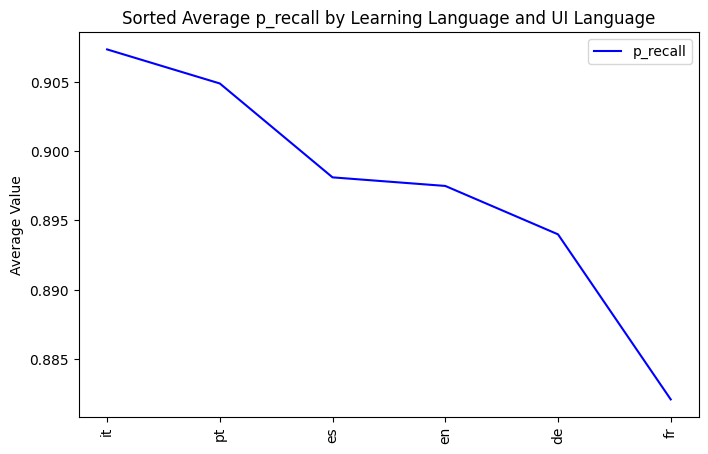

In [4]:
# Group the sample_df dataframe by learning_language and ui_language and calculate the mean of p_recall and delta
average_values = sample_df.groupby(['learning_language'])[['p_recall']].mean()

# Reset the index to convert the grouped data into a DataFrame
average_values = average_values.sort_values(by='p_recall', ascending=False)
average_values = average_values.reset_index()
print(average_values)

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.plot(average_values.index, average_values['p_recall'], color='blue', label='p_recall')


# Set the x-axis labels
plt.xticks(average_values.index, average_values['learning_language'], rotation=90)

# Set the y-axis label
plt.ylabel('Average Value')

# Set the title
plt.title('Sorted Average p_recall by Learning Language and UI Language')

# Add a legend
plt.legend()

# Show the plot
plt.show()



In [5]:
ui_language_counts = sample_df['ui_language'].value_counts()
language_counts = sample_df['learning_language'].value_counts()

for i in range(len(language_counts)):
    if i < len(ui_language_counts):
        print(f'Language: {language_counts.index[i].upper()}, Count: {language_counts[i]}, UI Count: {ui_language_counts[i]}')
    else:
        print(f'Language: {language_counts.index[i].upper()}, Count: {language_counts[i]}')


Language: EN, Count: 501196, UI Count: 784227
Language: ES, Count: 340968, UI Count: 364277
Language: FR, Count: 187736, UI Count: 94847
Language: DE, Count: 145075, UI Count: 42072
Language: IT, Count: 79091
Language: PT, Count: 31357


In [12]:
grouped = sample_df.groupby('learning_language')
even_languages_df = pd.DataFrame()

for group_name, group_df in grouped:
    group_sample = group_df.sample(n=30000, random_state=42)
    even_languages_df = pd.concat([even_languages_df, group_sample])

even_languages_df['learning_language'].value_counts()


learning_language
de    30000
en    30000
es    30000
fr    30000
it    30000
pt    30000
Name: count, dtype: int64

  learning_language  p_recall
0                it  0.909713
1                pt  0.904975
2                en  0.898130
3                es  0.898089
4                de  0.896129
5                fr  0.883975


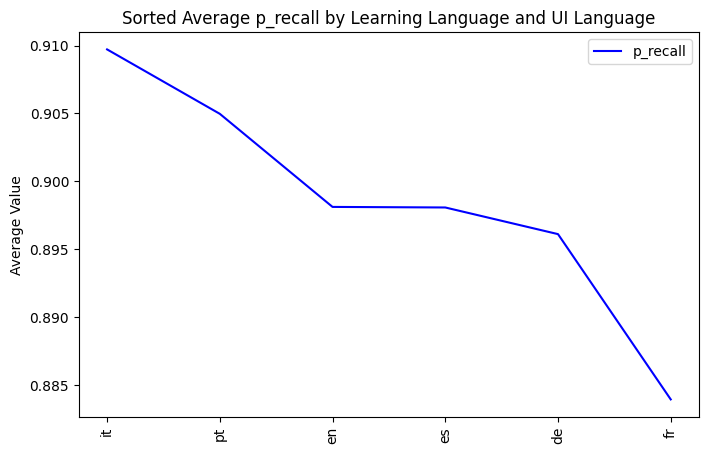

In [13]:
# Group the sample_df dataframe by learning_language and ui_language and calculate the mean of p_recall and delta
average_values = even_languages_df.groupby(['learning_language'])[['p_recall']].mean()

# Reset the index to convert the grouped data into a DataFrame
average_values = average_values.sort_values(by='p_recall', ascending=False)
average_values = average_values.reset_index()
print(average_values)

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.plot(average_values.index, average_values['p_recall'], color='blue', label='p_recall')


# Set the x-axis labels
plt.xticks(average_values.index, average_values['learning_language'], rotation=90)

# Set the y-axis label
plt.ylabel('Average Value')

# Set the title
plt.title('Sorted Average p_recall by Learning Language and UI Language')

# Add a legend
plt.legend()

# Show the plot
plt.show()

data about lexemes

In [14]:
# add the word column to the even_languages_df
sample_df['word'] = sample_df['lexeme_string'].str.extract(r'/(.*?)<', expand=False)


In [16]:
en_words = sample_df[sample_df['learning_language'] == 'en']
en_words['word'].value_counts()


word
prpers    38077
be        22741
a         16712
eat       16375
drink     12117
          ...  
center        1
damage        1
better        1
travel        1
space         1
Name: count, Length: 1405, dtype: int64

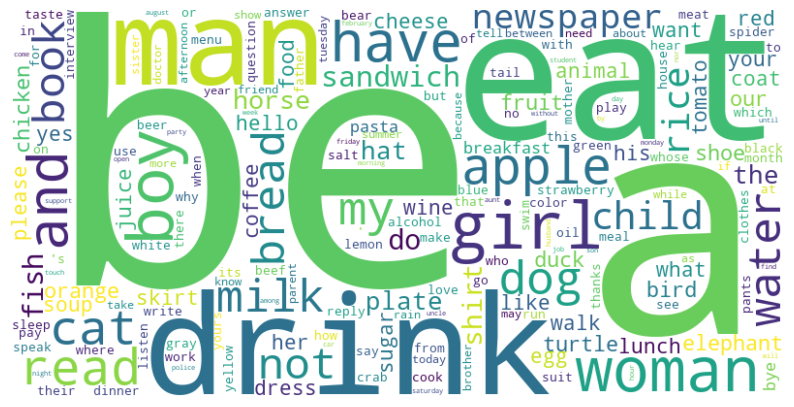

In [17]:
import wordcloud 

word_counts = en_words['word'].value_counts()

# Convert the word counts to a dictionary
word_freq_dict = word_counts.to_dict()
del word_freq_dict['prpers']

wc = wordcloud.WordCloud(width=800, height=400, background_color="white")

# Generate the word cloud
wc.generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### try to incorporate randomforestregressor

In [13]:
from statistics import mean
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your data is loaded into a pandas DataFrame named 'data'

# Separate features and target variable
features = ['timestamp', 'delta', 'history_seen', 'history_correct', 'session_seen', 'session_correct']
target = 'p_recall'

# Define number of folds for cross-validation
n_folds = 5

# Initialize lists to store results
mse_scores = []
r2_scores = []
adj_r2_scores = []

# KFold cross-validation
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

for train_index, test_index in kf.split(sample_df):
    X_train, X_test = sample_df.iloc[train_index][features], sample_df.iloc[test_index][features]
    y_train, y_test = sample_df.iloc[train_index][target], sample_df.iloc[test_index][target]

    # Create the random forest regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - len(features) - 1)

    # Store results
    mse_scores.append(mse)
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)

# Calculate and print average scores
print("Random Forest Regression Evaluation (KFold Cross-Validation):")
print(f"Average Mean Squared Error: {mean(mse_scores):.4f}")
print(f"Average R-squared: {mean(r2_scores):.4f}")
print(f"Average Adjusted R-squared: {mean(adj_r2_scores):.4f}")



Random Forest Regression Evaluation (KFold Cross-Validation):
Average Mean Squared Error: 0.0000
Average R-squared: 1.0000
Average Adjusted R-squared: 1.0000


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Define your features and target
features = ['timestamp', 'delta', 'history_seen', 'history_correct', 'session_seen', 'session_correct']
target = 'p_recall'

# Split your data into training and testing sets
X = sample_df[features]
y = sample_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
noise = np.random.normal(0, 0.01, size=X_train.shape)
X_train_noisy = X_train + noise

# Log-transform the target variable
y_train_log = np.log1p(y_train)

# Initialize a RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_noisy, y_train_log)

# Make predictions
predictions_log = rf.predict(X_test)
predictions = np.expm1(predictions_log)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate the R-squared
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2:.4f}")

# Calculate the adjusted R-squared
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - len(features) - 1)
print(f"Adjusted R-squared: {adj_r2:.4f}")

# Plot the feature importances
importances = rf.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# plot fitted vs residuals
residuals = y_test - predictions
plt.figure(figsize=(8, 5)) 
plt.scatter(predictions, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Fitted vs Residuals')
plt.axhline(y=0, color='black', linewidth=1)
plt.show()


KeyboardInterrupt: 

C:\Users\haram\AppData\Local\Temp\ipykernel_10268\3838838687.py:5: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c * np.exp(-d * x)
C:\Users\haram\AppData\Local\Temp\ipykernel_10268\3838838687.py:5: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c * np.exp(-d * x)


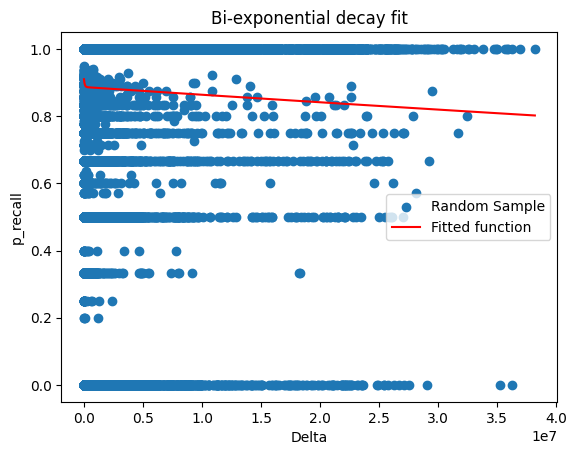

a = 0.02329608769144504, b = 1.5062932924495156e-05, c = 0.8866035421766755, d = 2.6279010508671867e-09


In [9]:
from scipy.optimize import curve_fit

# Define the bi-exponential decay function
def bi_exponential(x, a, b, c, d):
    return a * np.exp(-b * x) + c * np.exp(-d * x)

# Get the x and y values from your DataFrame
smaller_sample = sample_df.sample(frac=0.1, random_state=42)


x = smaller_sample['delta'].values
y = smaller_sample['p_recall'].values


# Fit the bi-exponential decay function to your data
popt, pcov = curve_fit(bi_exponential, x, y, p0=(1, 1e-6, 1, 1e-6))

x_fit = np.linspace(x.min(), x.max(), 1000)

# Compute the y values of the fitted function
y_fit = bi_exponential(x_fit, *popt)


# Plot the random sample
plt.scatter(x, y, label='Random Sample')

# Plot the fitted function
plt.plot(x_fit, y_fit, 'r', label='Fitted function')

plt.xlabel('Delta')
plt.ylabel('p_recall')
plt.title('Bi-exponential decay fit')
plt.legend()
plt.show()

# Print the optimal parameters
print(f"a = {popt[0]}, b = {popt[1]}, c = {popt[2]}, d = {popt[3]}")

C:\Users\haram\AppData\Local\Temp\ipykernel_25096\491849457.py:2: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k*(x - x0)))


L = 1.797274534963649, k = -8.602757491025249e-09, x0 = 76802.90858546621


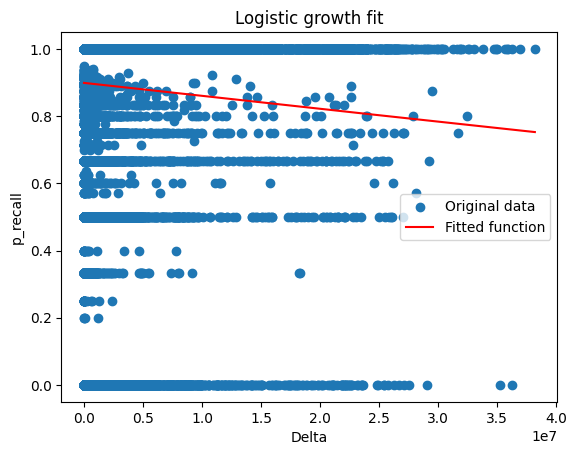

In [26]:
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k*(x - x0)))

# Fit the logistic growth function to your data
popt, pcov = curve_fit(logistic, x, y, p0=(max(y), 1, np.median(x)))

# Print the optimal parameters
print(f"L = {popt[0]}, k = {popt[1]}, x0 = {popt[2]}")

# Generate x values for the fitted function
x_fit = np.linspace(x.min(), x.max(), 1000)

# Compute the y values of the fitted function
y_fit = logistic(x_fit, *popt)

# Plot the original data
plt.scatter(x, y, label='Original data')

# Plot the fitted function
plt.plot(x_fit, y_fit, 'r', label='Fitted function')
plt.xlabel('Delta')
plt.ylabel('p_recall')
plt.title('Logistic growth fit')
plt.legend()
plt.show()


a = 0.8990470938763663, t = 152425910.5171409


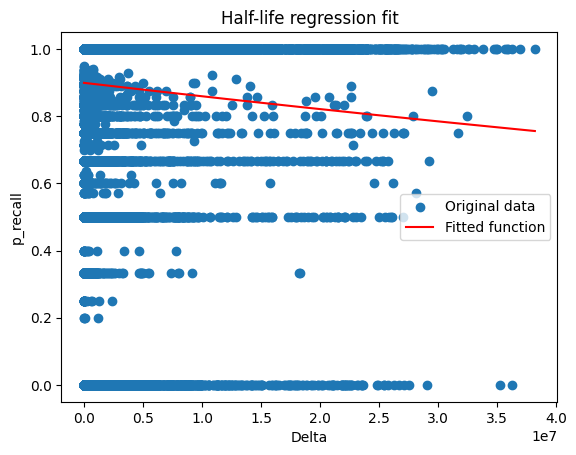

In [10]:
# Define the half-life regression function
def half_life(x, a, t):
    return a * np.exp(-np.log(2) * x / t)

# Fit the half-life regression function to your data
popt, pcov = curve_fit(half_life, x, y, p0=(max(y), np.median(x)))

# Print the optimal parameters
print(f"a = {popt[0]}, t = {popt[1]}")

# Generate x values for the fitted function
x_fit = np.linspace(x.min(), x.max(), 1000)

# Compute the y values of the fitted function
y_fit = half_life(x_fit, *popt)

# Plot the original data
plt.scatter(x, y, label='Original data')

# Plot the fitted function
plt.plot(x_fit, y_fit, 'r', label='Fitted function')

plt.xlabel('Delta')
plt.ylabel('p_recall')
plt.title('Half-life regression fit')
plt.legend()
plt.show()

In [13]:
def language_model_eval(lang, method, input_file, max_lines=None, omit_bias = True, omit_lexemes= True, omit_h_term= True):
    trainset, testset = read_data(input_file, method, omit_bias, omit_lexemes, max_lines)
    model = SpacedRepetitionModel(method=method, omit_h_term=omit_h_term)
    model.train(trainset)
    model.eval(testset, 'test')
    if not os.path.exists('results/'+'/'+method+'/'):
        os.makedirs('results/'+method+'/')
    model.dump_weights(f'results/lang-hlr/{lang}-weights')
    model.dump_predictions(f'results/lang-hlr/{lang}-preds', testset)

In [ ]:
en_df = sample_df[sample_df['learning_language'] == 'en']
es_df = sample_df[sample_df['learning_language'] == 'es']
fr_df = sample_df[sample_df['learning_language'] == 'fr']
de_df = sample_df[sample_df['learning_language'] == 'de']
it_df = sample_df[sample_df['learning_language'] == 'it']
nl_df = sample_df[sample_df['learning_language'] == 'pt']

In [15]:
language_model_eval('en', 'hlr', 'sample.csv')
language_model_eval('es', 'hlr', 'sample.csv')
language_model_eval('fr', 'hlr', 'sample.csv')
language_model_eval('de', 'hlr', 'sample.csv')
language_model_eval('it', 'hlr', 'sample.csv')
language_model_eval('pt', 'hlr', 'sample.csv')



reading data...0...1000000...done!
test	50652479.4 (p=41979.1, h=50610500.4, l2=0.0)	mae(p)=0.407	cor(p)=0.048	mae(h)=155.270	cor(h)=-0.048


right 0.20013259444164644
wrong 0.09006280252340347


reading data...0...1000000...done!
test	50652059.6 (p=41972.8, h=50610086.8, l2=0.0)	mae(p)=0.407	cor(p)=0.048	mae(h)=155.269	cor(h)=-0.048


right 0.20046059975019456
wrong 0.08987710914014965


reading data...0...1000000...done!
test	50650048.2 (p=41938.3, h=50608110.0, l2=0.0)	mae(p)=0.406	cor(p)=0.048	mae(h)=155.267	cor(h)=-0.048


right 0.20158717375677196
wrong 0.09033980762357052


reading data...0...1000000...done!
test	50651493.1 (p=41962.6, h=50609530.4, l2=0.0)	mae(p)=0.407	cor(p)=0.048	mae(h)=155.269	cor(h)=-0.048


right 0.2007612862708746
wrong 0.09008228470428536


reading data...0...1000000...done!
test	50650400.3 (p=41943.6, h=50608456.7, l2=0.0)	mae(p)=0.406	cor(p)=0.047	mae(h)=155.267	cor(h)=-0.048


right 0.20133234724052118
wrong 0.09044824705074753


reading data...0...1000000...done!
test	50650298.5 (p=41941.8, h=50608356.7, l2=0.0)	mae(p)=0.406	cor(p)=0.047	mae(h)=155.267	cor(h)=-0.048


right 0.20138305540197443
wrong 0.09048583160152515


In [4]:
sr_evaluate('results/lang-hlr/en-preds')
print('=====================================')
sr_evaluate('results/lang-hlr/es-preds')
print('=====================================')
sr_evaluate('results/lang-hlr/fr-preds')
print('=====================================')
sr_evaluate('results/lang-hlr/de-preds')
print('=====================================')
sr_evaluate('results/lang-hlr/it-preds')
print('=====================================')
sr_evaluate('results/lang-hlr/pt-preds')
print('=====================================')

%%%%%%%%%%%%%%%%%% results/lang-hlr/en-preds %%%%%%%%%%%%%%%%%%
==== mean absolute error ====
p-value: 0.0
==== area under the ROC curve ====
ROC AUC: 0.5305562909817253
p-value: 0.0
==== half-life correlation ====
Spearman correlation coefficient: -0.13808960009097768
p-value: 0.0
%%%%%%%%%%%%%%%%%% results/lang-hlr/es-preds %%%%%%%%%%%%%%%%%%
==== mean absolute error ====
p-value: 0.0
==== area under the ROC curve ====
ROC AUC: 0.5305649491294323
p-value: 0.0
==== half-life correlation ====
Spearman correlation coefficient: -0.13801721575445214
p-value: 0.0
%%%%%%%%%%%%%%%%%% results/lang-hlr/fr-preds %%%%%%%%%%%%%%%%%%
==== mean absolute error ====
p-value: 0.0
==== area under the ROC curve ====
ROC AUC: 0.530565188586925
p-value: 0.0
==== half-life correlation ====
Spearman correlation coefficient: -0.13801661730359013
p-value: 0.0
%%%%%%%%%%%%%%%%%% results/lang-hlr/de-preds %%%%%%%%%%%%%%%%%%
==== mean absolute error ====
p-value: 0.0
==== area under the ROC curve ====
ROC AUC: 0